In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_drinks_content = pd.read_csv("data_in/day02_hw/starbucks_drinkMenu_expanded.csv")

In [3]:
drinks_content = raw_drinks_content.copy()

In [4]:
drinks_content.head(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
drinks_content.tail(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [6]:
drinks_content.describe

<bound method NDFrame.describe of               Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Crea

In [8]:
drinks_content.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [11]:
# 02
drinks_content["Calories"].mean()

193.87190082644628

In [12]:
drinks_content["Calories"].max()

510

In [13]:
drinks_content["Calories"].min()

0

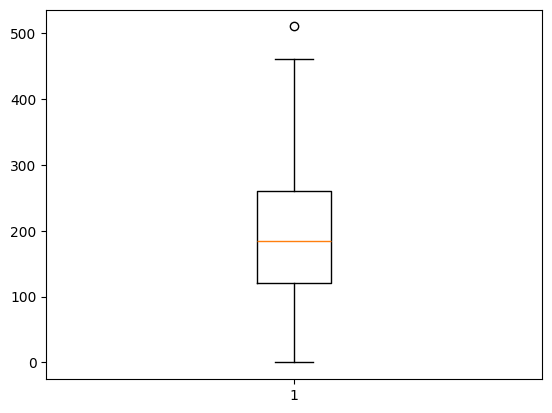

In [17]:
plt.boxplot("Calories", data = drinks_content);

In [24]:
drinks = drinks_content.loc[:, ["Beverage_category", "Beverage", "Beverage_prep", "Calories"]].copy()

In [27]:
drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories'], dtype='object')

In [30]:
drinks.isna().sum()

Beverage_category    0
Beverage             0
Beverage_prep        0
Calories             0
dtype: int64

In [41]:
drinks_mean_kcal = drinks.groupby("Beverage")["Calories"].mean().reset_index(name = "Mean kcal")

In [50]:
# 05
drinks_bevprep_mean = drinks.groupby("Beverage_prep")["Calories"].mean().reset_index(name = "mean_kcal")
avg_prep_kcal = drinks["Calories"].mean()
drinks_bevprep_mean["above_avg_kcal"] = drinks_bevprep_mean["mean_kcal"]-avg_prep_kcal
drinks_bevprep_mean["is_above_avg_kcal"] = drinks_bevprep_mean["above_avg_kcal"].apply(lambda x: "True" if x >0 else "False")

In [51]:
drinks_bevprep_mean.loc[drinks_bevprep_mean["is_above_avg_kcal"] == "True"]

,Beverage_prep,mean_kcal,above_avg_kcal,is_above_avg_kcal
0,2% Milk,218.000000,24.128099,True
3,Grande Nonfat Milk,209.615385,15.743484,True
7,Soymilk,207.272727,13.400826,True
11,Venti Nonfat Milk,260.000000,66.128099,True
12,Whole Milk,283.750000,89.878099,True


In [63]:
drinks_coffee = drinks.loc[drinks["Beverage"] == "Coffee"].copy()

In [61]:
drinks_coffee.loc[drinks_coffee["Calories"].idxmin()]

Beverage_category    Frappuccino® Light Blended Coffee
Beverage                                        Coffee
Beverage_prep                         Tall Nonfat Milk
Calories                                            90
calorie_diff                                        45
Name: 217, dtype: object

In [57]:
drinks_coffee["Calories"].min()

90

In [64]:
drinks_espresso = drinks.loc[drinks["Beverage_category"] == "Classic Espresso Drinks"].copy()

In [80]:
drinks_espresso_kcalsummary = drinks_espresso.groupby("Beverage_prep")["Calories"].mean().reset_index(name = "mean_kcals")

In [75]:
drinks_espresso_kcalsummary.sort_values("mean_kcals", ascending  = False)

,Beverage_prep,mean_kcals
11,Venti Nonfat Milk,194.000
0,2% Milk,184.375
7,Soymilk,151.250
3,Grande Nonfat Milk,150.000
9,Tall Nonfat Milk,116.000
5,Short Nonfat Milk,78.000
10,Venti,25.000
2,Grande,15.000
1,Doppio,10.000
8,Tall,10.000
